In [1]:
import requests, re, pandas as pd, numpy as np
from itertools import product
from bs4 import BeautifulSoup as bs
from scipy import stats
import pandas as pd
import numpy as np
from datetime import datetime
from xgboost import XGBClassifier, XGBRegressor
import utils
import cleaning, utils
import importlib

importlib.reload(utils)

<module 'utils' from 'Y:\\Internship\\SoMin\\Notebook\\src\\utils.py'>

In [2]:
# ACCESS_TOKEN = 'EAAEau61SMogBAO4Lp0pJaYlJzc67wTychUcwF6gdpLWlet5TqpwnB6k6u0v8DuVAWFaMGO09CQlA7GoOjJnJzTdwzTCO2ZBtCQO721V5U1Qjy5vb7pZCEBC2N5AZAbzVWVYylg1bZCSehy28TTJP7QntMgpxGhD5einLmDxUz3pFfYHPmi47'

In [3]:
import os
import pickle
from datetime import datetime
def ensure_folder_exists(folder_path):
    """
    Creates the specified folder if it does not already exist
    """
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)


def load_pickle(file_path):
    """
    Loads a pickle from the file system
    """
    return pickle.load(open(file_path, 'rb')) if os.path.isfile(file_path) else None


def save_pickle(file_path, data):
    """
    Saves the specified object as a pickle to the file system
    """
    with open(file_path, 'wb') as f:
        pickle.dump(data, f)
        
target = 'Y:/Internship/SoMin/raw/20220523/adlibrary_ads.pkl'
if os.path.getsize(target) > 0: 
    all_ads = load_pickle(target)
    print(len(all_ads))
else:
    print('empty')

38985


In [5]:
df = cleaning.process_ads(all_ads)
df

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,max_audience_size,impressions,spend,CPM,CPM2,facebook,instagram,messenger,audience_network,demographic_dist
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,100000,2499,49,33.011004,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g..."
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,500000,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g..."
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,5000,1499,49,49.524762,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g..."
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,50000,1499,49,49.524762,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g..."
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,5000,12499,349,26.601773,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38869,analytics,BR,115255603631922,Ricardo Caminhoneiro 22310,600549173955885,2020-08-27,8,2020-08-27,2020-08-29,3,...,NaN,2499,49,33.011004,19.607843,1,1,1,0,"[{'percentage': '0.046118', 'age': '35-44', 'g..."
38870,analytics,BR,197246230417092,Superweek - European Analytics Summit,1132843716910980,2019-06-11,6,2019-06-11,2019-06-19,9,...,NaN,64999,249,4.271490,3.830828,1,0,0,0,"[{'percentage': '0.000264', 'age': '55-64', 'g..."
38871,analytics,BR,197246230417092,Superweek - European Analytics Summit,1409280549253390,2019-06-07,6,2019-06-09,2019-06-11,3,...,NaN,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.395973', 'age': '25-34', 'g..."
38872,analytics,BR,197246230417092,Superweek - European Analytics Summit,2268489546735968,2019-06-07,6,2019-06-09,2019-06-12,4,...,NaN,9499,49,9.900990,5.158438,1,0,0,0,"[{'percentage': '0.000219', 'age': '18-24', 'g..."


In [6]:
df

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM,CPM2,impressions2,spend2,CPM3,facebook,instagram,messenger,audience_network,demographic_dist
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,3,...,33.011004,19.607843,2499,99,39.615846,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g..."
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,3,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g..."
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,5,...,49.524762,32.688459,1499,99,66.044029,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g..."
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,15,...,49.524762,32.688459,1499,99,66.044029,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g..."
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,18,...,26.601773,27.922234,12499,349,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38869,analytics,BR,115255603631922,Ricardo Caminhoneiro 22310,600549173955885,2020-08-27,8,2020-08-27,2020-08-29,2,...,33.011004,19.607843,2499,99,39.615846,1,1,1,0,"[{'percentage': '0.046118', 'age': '35-44', 'g..."
38870,analytics,BR,197246230417092,Superweek - European Analytics Summit,1132843716910980,2019-06-11,6,2019-06-11,2019-06-19,8,...,4.271490,3.830828,64999,249,3.830828,1,0,0,0,"[{'percentage': '0.000264', 'age': '55-64', 'g..."
38871,analytics,BR,197246230417092,Superweek - European Analytics Summit,1409280549253390,2019-06-07,6,2019-06-09,2019-06-11,2,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.395973', 'age': '25-34', 'g..."
38872,analytics,BR,197246230417092,Superweek - European Analytics Summit,2268489546735968,2019-06-07,6,2019-06-09,2019-06-12,3,...,9.900990,5.158438,9499,99,10.422150,1,0,0,0,"[{'percentage': '0.000219', 'age': '18-24', 'g..."


In [10]:
df[df.ad_id == '762749274711708']

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM,CPM2,impressions2,spend2,CPM3,facebook,instagram,messenger,audience_network,demographic_dist
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,3,...,33.011004,19.607843,2499,99,39.615846,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g..."


In [18]:
ads_update = utils.obtain_ads_page_id('100470349235347', 'US', access_token=ACCESS_TOKEN)

Error Status Code 400 for URL: https://graph.facebook.com/v13.0/ads_archive?access_token=EAAEau61SMogBAO4Lp0pJaYlJzc67wTychUcwF6gdpLWlet5TqpwnB6k6u0v8DuVAWFaMGO09CQlA7GoOjJnJzTdwzTCO2ZBtCQO721V5U1Qjy5vb7pZCEBC2N5AZAbzVWVYylg1bZCSehy28TTJP7QntMgpxGhD5einLmDxUz3pFfYHPmi47&fields=id%2Cad_creation_time%2Cad_delivery_start_time%2Cad_delivery_stop_time%2Cad_snapshot_url%2Cad_creative_bodies%2Cad_creative_link_captions%2Cad_creative_link_titles%2Cad_creative_link_descriptions%2Clanguages%2Cpage_id%2Cpage_name%2Cbylines%2Ccurrency%2Cspend%2Cimpressions%2Cestimated_audience_size%2Cpublisher_platforms%2Cdemographic_distribution%2Cdelivery_by_region&search_page_ids=100470349235347&media_type=IMAGE&ad_active_status=ALL&ad_reached_countries=US


In [14]:
ads_update

[{'id': '740015123855412',
  'ad_creation_time': '2022-05-22',
  'ad_delivery_start_time': '2022-05-22',
  'ad_snapshot_url': 'https://www.facebook.com/ads/archive/render_ad/?id=740015123855412&access_token=EAAEau61SMogBAKXf5ZCiYZC2WkmfCAkZCEz1cQoZBTgg4AdxRAAmG5ZAcH8hrSEsXPDZBPFodOdKr7s49i4ZBecZAZBnnV86z5HMCZAaYp1s2WoUj5P5PzYXTX6Gao2awkZBBudMZBubxwlG3UeRUZBCsBTb5GCeHbAsJFdf0Bal6Rpou4ORNt56cpVpK',
  'ad_creative_bodies': ['Fossil fuel exporters are driving up monthly gas and electricity bills for American families.  The more they export, the more we pay.  #SaveTexas'],
  'ad_creative_link_captions': ['facebook.com'],
  'ad_creative_link_titles': ['Save Texas'],
  'ad_creative_link_descriptions': ['Save Texas!'],
  'languages': ['en'],
  'page_id': '100470349235347',
  'page_name': 'Save Texas',
  'bylines': 'Texas Campaign for the Environment',
  'currency': 'USD',
  'spend': {'lower_bound': '200', 'upper_bound': '299'},
  'impressions': {'lower_bound': '15000', 'upper_bound': '19999'},

In [16]:
ads_update_df = cleaning.process_ads2(ads_update)

impressions1
spend1
impressions1
spend2
impressions1
spend2
impressions1
spend2
impressions1
spend2
impressions1
spend2
impressions1
spend2
impressions1
spend2
impressions2
spend2
impressions1
spend2
impressions2
spend2
impressions1
spend2
impressions1
spend2
impressions1
spend2
impressions1
spend2
impressions1
spend2
impressions1
spend2
impressions1
spend2


In [19]:
ads_update_df[ads_update_df['ad_id'] == '762749274711708'].iloc[0]

country                                                             US
page_id                                                100470349235347
page_name                                                   Save Texas
ad_id                                                  762749274711708
ad_creation_date                                            2022-05-03
ad_creation_month                                                    5
delivery_start                                              2022-05-03
delivery_stop                                               2022-05-06
delivery_period                                                      3
ad_url               https://www.facebook.com/ads/archive/render_ad...
ad_body              In a technical report updated for the first ti...
uses_multi_body                                                      0
link_caption                                     oceanservice.noaa.gov
uses_multi_capt                                                      0
link_t

In [20]:
df[df['ad_id'] == '762749274711708'].iloc[0]

search_term                                                    ad-tech
country                                                             US
page_id                                                100470349235347
page_name                                                   Save Texas
ad_id                                                  762749274711708
ad_creation_date                                            2022-05-03
ad_creation_month                                                    5
delivery_start                                              2022-05-03
delivery_stop                                               2022-05-06
delivery_period                                                      3
ad_url               https://www.facebook.com/ads/archive/render_ad...
ad_body              In a technical report updated for the first ti...
uses_multi_body                                                      0
link_caption                                     oceanservice.noaa.gov
uses_m

In [7]:
def process_ads(ads):
    """
    processes Ads retrieved from Ads Archive (FB Ad Library)
    """
    df = pd.DataFrame(ads)    
    clean = []
    for _, row in df.iterrows():
        m = {}
        m['search_term'] = row['topic']
        m['country'] = row['country']
        m['page_id'] = row['page_id']
        m['page_name'] = row['page_name']
        m['ad_id'] = row['id']
        
        m['ad_creation_date'] = row['ad_creation_time']
        if m['ad_creation_date'] is np.nan:
            continue
        m['ad_creation_month'] = int(m['ad_creation_date'][5:7])
        
        
        m['delivery_start'] = row['ad_delivery_start_time']
        if m['delivery_start'] is np.nan:
            continue
            
        m['delivery_stop'] = row['ad_delivery_stop_time']
#         if m['delivery_stop'] is np.nan:
#             continue
        
#         start = datetime.strptime(m['delivery_start'], '%Y-%m-%d')
#         stop = datetime.strptime(m['delivery_stop'], '%Y-%m-%d')
#         m['delivery_period'] = (stop-start).days
        
        m['ad_url'] = row['ad_snapshot_url']
        
#         try:
#             source = soup(requests.get(row['ad_snapshot_url']).content, 'html.parser')
#             m['image_url'] = get_image_url(source)
#         except:
#             m['image_url'] = np.nan # some ads are wrongly classified as having images
        
        ad_body = row['ad_creative_bodies']
        m['ad_body'] = ad_body[0] if (type(ad_body) == list) else ''
        m['uses_multi_body'] = 1 if ((type(ad_body) == list) and (len(set(ad_body)) > 1)) else 0
        
        link_capt = row['ad_creative_link_captions']
        m['link_caption'] = link_capt[0] if (type(link_capt) == list) else ''
        m['uses_multi_capt'] = 1 if ((type(link_capt) == list) and (len(set(link_capt)) > 1)) else 0
        
        link_title = row['ad_creative_link_titles']
        m['link_title'] = link_title[0] if (type(link_title) == list) else ''
        m['uses_multi_title'] = 1 if ((type(link_title) == list) and (len(set(link_title)) > 1)) else 0
        
        link_desc = row['ad_creative_link_descriptions']
        m['link_description'] = link_desc[0] if (type(link_desc) == list) else ''
        m['uses_multi_desc'] = 1 if ((type(link_desc) == list) and (len(set(link_desc)) > 1)) else 0
        
        lang = row['languages']
        m['language'] = ','.join(lang) if (type(lang) == list) else ''
        m['uses_multi_lang'] = 1 if ((type(lang) == list) and (len(set(lang)) > 1)) else 0
        
        m['funded_by'] = row['bylines'] if type(row['bylines']) == str else ''
        m['currency'] = row['currency']
        
        spend = row['spend']
        m['min_spend'] = spend.get('lower_bound', np.nan)
        m['max_spend'] = spend.get('upper_bound', np.nan)
        
        impressions = row['impressions']
        m['min_impressions'] = impressions.get('lower_bound', np.nan)
        m['max_impressions'] = impressions.get('upper_bound', np.nan)
        
        audience_size = row['estimated_audience_size']
        m['min_audience_size'] = audience_size.get('lower_bound', np.nan) if type(audience_size)==dict else np.nan
        m['max_audience_size'] = audience_size.get('upper_bound', np.nan) if type(audience_size)==dict else np.nan
        
        
        if m['max_impressions'] is np.nan or m['min_impressions'] is np.nan: 
            m['impressions'] = 0
            continue
        else:
            m['impressions'] = (int(m['max_impressions']) + int(m['min_impressions']))/2
            
        if m['max_spend'] is np.nan or m['min_spend'] is np.nan: 
            m['spend'] = 0
            continue
        else:
            m['spend'] = (int(m['max_spend']) + int(m['min_spend']))/2
        
        
        if m['max_impressions'] is np.nan or m['max_impressions'] == 0:
            m['CPM'] = 0
            continue
        else:
            m['CPM'] = int(m['max_spend']) / int(m['max_impressions']) * 1000
        
        if m['max_impressions'] is np.nan or m['max_impressions'] == 0:
            m['CPM2'] = 0
            continue
        else:
            m['CPM2'] = int(m['spend']) / int(m['impressions']) * 1000
        
        
        ### get rid of 0 value
        
        if m['max_impressions'] is np.nan or m['min_impressions'] is np.nan: 
            m['impressions2'] = 0
            continue
        else:
            if int(m['min_impressions']) != 0:
#                 print('impressions1')
                m['impressions2'] = (int(m['max_impressions']) + int(m['min_impressions']))/2
            else:
#                 print('impressions2')
                m['impressions2'] = m['max_impressions']
            
        if m['max_spend'] is np.nan or m['min_spend'] is np.nan: 
            m['spend2'] = 0
            continue
        else:
            if int(m['min_spend'])!=0:
#                 print('spend1')
                m['spend2'] = (int(m['max_spend']) + int(m['min_spend']))/2
            else:
#                 print('spend2')
                m['spend2'] = m['max_spend']
               
        #CPM3
        if m['max_impressions'] is np.nan or m['max_impressions'] == 0:
            m['CPM3'] = 0
            continue
        else:
            m['CPM3'] = int(m['spend2']) / int(m['impressions2']) * 1000
                
        
        
        platforms = row['publisher_platforms']
        m['facebook'] = 1 if ((type(platforms) == list) and ('facebook' in platforms)) else 0
        m['instagram'] = 1 if ((type(platforms) == list) and ('instagram' in platforms)) else 0
        m['messenger'] = 1 if ((type(platforms) == list) and ('messenger' in platforms)) else 0
        m['audience_network'] = 1 if ((type(platforms) == list) and ('audience_network' in platforms)) else 0
        
        m['demographic_dist'] = row['demographic_distribution']
        clean.append(m)
    
    df = pd.DataFrame(clean)
    df['min_spend']=df['min_spend'].astype('int64')
    df['max_spend']=df['max_spend'].astype('int64')
    df['min_impressions']=df['min_impressions'].astype('int64')
    df['max_impressions']=df['max_impressions'].astype('int64')
    
    df['impressions']=df['impressions'].astype('int64')
    df['impressions2']=df['impressions2'].astype('int64')
    df['spend']=df['spend'].astype('int64')
    df['spend2']=df['spend2'].astype('int64')


    df['country']=df['country'].astype('category')
    df['search_term']=df['search_term'].astype('category')
    
    
    return df

In [6]:
df2 = process_ads(all_ads)

In [7]:
df2

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,ad_url,...,CPM,CPM2,impressions2,spend2,CPM3,facebook,instagram,messenger,audience_network,demographic_dist
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,https://www.facebook.com/ads/archive/render_ad...,...,33.011004,19.607843,2499,99,39.615846,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g..."
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g..."
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,https://www.facebook.com/ads/archive/render_ad...,...,49.524762,32.688459,1499,99,66.044029,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g..."
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,https://www.facebook.com/ads/archive/render_ad...,...,49.524762,32.688459,1499,99,66.044029,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g..."
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,https://www.facebook.com/ads/archive/render_ad...,...,26.601773,27.922234,12499,349,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38925,analytics,BR,115255603631922,Ricardo Caminhoneiro 22310,600549173955885,2020-08-27,8,2020-08-27,2020-08-29,https://www.facebook.com/ads/archive/render_ad...,...,33.011004,19.607843,2499,99,39.615846,1,1,1,0,"[{'percentage': '0.046118', 'age': '35-44', 'g..."
38926,analytics,BR,197246230417092,Superweek - European Analytics Summit,1132843716910980,2019-06-11,6,2019-06-11,2019-06-19,https://www.facebook.com/ads/archive/render_ad...,...,4.271490,3.830828,64999,249,3.830828,1,0,0,0,"[{'percentage': '0.000264', 'age': '55-64', 'g..."
38927,analytics,BR,197246230417092,Superweek - European Analytics Summit,1409280549253390,2019-06-07,6,2019-06-09,2019-06-11,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.395973', 'age': '25-34', 'g..."
38928,analytics,BR,197246230417092,Superweek - European Analytics Summit,2268489546735968,2019-06-07,6,2019-06-09,2019-06-12,https://www.facebook.com/ads/archive/render_ad...,...,9.900990,5.158438,9499,99,10.422150,1,0,0,0,"[{'percentage': '0.000219', 'age': '18-24', 'g..."


In [8]:
df2.iloc[0]

search_term                                                    ad-tech
country                                                             US
page_id                                                100470349235347
page_name                                                   Save Texas
ad_id                                                  762749274711708
ad_creation_date                                            2022-05-03
ad_creation_month                                                    5
delivery_start                                              2022-05-03
delivery_stop                                               2022-05-06
ad_url               https://www.facebook.com/ads/archive/render_ad...
ad_body              In a technical report updated for the first ti...
uses_multi_body                                                      0
link_caption                                     oceanservice.noaa.gov
uses_multi_capt                                                      0
link_t

In [12]:
df3 = df2
df4 = df3[df3['delivery_stop'].isna()]

In [14]:
df4

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,ad_url,...,CPM,CPM2,impressions2,spend2,CPM3,facebook,instagram,messenger,audience_network,demographic_dist
353,ed-tech,US,1431889706937050,Free & Fair Markets Initiative,2762194074076730,2022-04-29,4,2022-05-01,NaN,https://www.facebook.com/ads/archive/render_ad...,...,19.803961,10.891309,4499,99,22.004890,1,1,0,0,"[{'percentage': '0.001177', 'age': '25-34', 'g..."
354,ed-tech,US,1431889706937050,Free & Fair Markets Initiative,1729604084044789,2022-04-29,4,2022-05-01,NaN,https://www.facebook.com/ads/archive/render_ad...,...,33.011004,19.607843,2499,99,39.615846,1,1,0,0,"[{'percentage': '0.002766', 'age': '65+', 'gen..."
1416,electric-vehicles,US,104178704279594,Main St. First,681506836245171,2022-05-22,5,2022-05-22,NaN,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,NaN
1417,electric-vehicles,US,108620667163768,For Our Future,366262202140520,2022-05-22,5,2022-05-22,NaN,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,NaN
1418,electric-vehicles,US,125179374733697,Big News Buzz,722062319142320,2022-05-22,5,2022-05-22,NaN,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,NaN
1432,electric-vehicles,US,6204742571,Sierra Club,519721129770217,2022-04-08,4,2022-04-08,NaN,https://www.facebook.com/ads/archive/render_ad...,...,5.980120,5.242216,47499,249,5.242216,1,1,0,0,"[{'percentage': '3.5E-5', 'age': '13-17', 'gen..."
1443,electric-vehicles,US,105576028300637,Building Back Together,510037094149689,2022-03-22,3,2022-03-22,NaN,https://www.facebook.com/ads/archive/render_ad...,...,4.983416,4.527355,54999,249,4.527355,1,1,0,0,"[{'percentage': '0.000161', 'age': '13-17', 'g..."
3745,clean-energy,US,450525781774645,Ohio Conservative Energy Forum,1157908801668008,2022-05-19,5,2022-05-19,NaN,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,1,0,0,"[{'percentage': '0.074074', 'age': '45-54', 'g..."
3746,clean-energy,US,1521463681450292,IL CleanJobs,746413549718018,2022-05-19,5,2022-05-19,NaN,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,1,0,0,"[{'percentage': '0.035714', 'age': '25-34', 'g..."
3747,clean-energy,US,90022052772,Williams,760010165164801,2022-05-19,5,2022-05-21,NaN,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,1,0,0,NaN


In [16]:
df4.index = range(df4.shape[0])
df4

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,ad_url,...,CPM,CPM2,impressions2,spend2,CPM3,facebook,instagram,messenger,audience_network,demographic_dist
0,ed-tech,US,1431889706937050,Free & Fair Markets Initiative,2762194074076730,2022-04-29,4,2022-05-01,NaN,https://www.facebook.com/ads/archive/render_ad...,...,19.803961,10.891309,4499,99,22.004890,1,1,0,0,"[{'percentage': '0.001177', 'age': '25-34', 'g..."
1,ed-tech,US,1431889706937050,Free & Fair Markets Initiative,1729604084044789,2022-04-29,4,2022-05-01,NaN,https://www.facebook.com/ads/archive/render_ad...,...,33.011004,19.607843,2499,99,39.615846,1,1,0,0,"[{'percentage': '0.002766', 'age': '65+', 'gen..."
2,electric-vehicles,US,104178704279594,Main St. First,681506836245171,2022-05-22,5,2022-05-22,NaN,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,NaN
3,electric-vehicles,US,108620667163768,For Our Future,366262202140520,2022-05-22,5,2022-05-22,NaN,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,NaN
4,electric-vehicles,US,125179374733697,Big News Buzz,722062319142320,2022-05-22,5,2022-05-22,NaN,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,NaN
5,electric-vehicles,US,6204742571,Sierra Club,519721129770217,2022-04-08,4,2022-04-08,NaN,https://www.facebook.com/ads/archive/render_ad...,...,5.980120,5.242216,47499,249,5.242216,1,1,0,0,"[{'percentage': '3.5E-5', 'age': '13-17', 'gen..."
6,electric-vehicles,US,105576028300637,Building Back Together,510037094149689,2022-03-22,3,2022-03-22,NaN,https://www.facebook.com/ads/archive/render_ad...,...,4.983416,4.527355,54999,249,4.527355,1,1,0,0,"[{'percentage': '0.000161', 'age': '13-17', 'g..."
7,clean-energy,US,450525781774645,Ohio Conservative Energy Forum,1157908801668008,2022-05-19,5,2022-05-19,NaN,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,1,0,0,"[{'percentage': '0.074074', 'age': '45-54', 'g..."
8,clean-energy,US,1521463681450292,IL CleanJobs,746413549718018,2022-05-19,5,2022-05-19,NaN,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,1,0,0,"[{'percentage': '0.035714', 'age': '25-34', 'g..."
9,clean-energy,US,90022052772,Williams,760010165164801,2022-05-19,5,2022-05-21,NaN,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,1,0,0,NaN


In [20]:
on_going_ad

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,ad_url,...,CPM,CPM2,impressions2,spend2,CPM3,facebook,instagram,messenger,audience_network,demographic_dist
0,ed-tech,US,1431889706937050,Free & Fair Markets Initiative,2762194074076730,2022-04-29,4,2022-05-01,NaN,https://www.facebook.com/ads/archive/render_ad...,...,19.803961,10.891309,4499,99,22.004890,1,1,0,0,"[{'percentage': '0.001177', 'age': '25-34', 'g..."
1,ed-tech,US,1431889706937050,Free & Fair Markets Initiative,1729604084044789,2022-04-29,4,2022-05-01,NaN,https://www.facebook.com/ads/archive/render_ad...,...,33.011004,19.607843,2499,99,39.615846,1,1,0,0,"[{'percentage': '0.002766', 'age': '65+', 'gen..."
2,electric-vehicles,US,104178704279594,Main St. First,681506836245171,2022-05-22,5,2022-05-22,NaN,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,NaN
3,electric-vehicles,US,108620667163768,For Our Future,366262202140520,2022-05-22,5,2022-05-22,NaN,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,NaN
4,electric-vehicles,US,125179374733697,Big News Buzz,722062319142320,2022-05-22,5,2022-05-22,NaN,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,NaN
5,electric-vehicles,US,6204742571,Sierra Club,519721129770217,2022-04-08,4,2022-04-08,NaN,https://www.facebook.com/ads/archive/render_ad...,...,5.980120,5.242216,47499,249,5.242216,1,1,0,0,"[{'percentage': '3.5E-5', 'age': '13-17', 'gen..."
6,electric-vehicles,US,105576028300637,Building Back Together,510037094149689,2022-03-22,3,2022-03-22,NaN,https://www.facebook.com/ads/archive/render_ad...,...,4.983416,4.527355,54999,249,4.527355,1,1,0,0,"[{'percentage': '0.000161', 'age': '13-17', 'g..."
7,clean-energy,US,450525781774645,Ohio Conservative Energy Forum,1157908801668008,2022-05-19,5,2022-05-19,NaN,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,1,0,0,"[{'percentage': '0.074074', 'age': '45-54', 'g..."
8,clean-energy,US,1521463681450292,IL CleanJobs,746413549718018,2022-05-19,5,2022-05-19,NaN,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,1,0,0,"[{'percentage': '0.035714', 'age': '25-34', 'g..."
9,clean-energy,US,90022052772,Williams,760010165164801,2022-05-19,5,2022-05-21,NaN,https://www.facebook.com/ads/archive/render_ad...,...,99.099099,98.196393,999,99,99.099099,1,1,0,0,NaN


In [21]:
ads = utils.obtain_ads_page_id('1431889706937050', 'US')

In [36]:
on_going_ad = np.array(on_going_ad)

In [38]:
for ad in on_going_ad:
    if ad['ad_id'] == '2762194074076730':
        print(ad['delivery_stop'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
on_going_ad = df3[df3['delivery_stop'].isna()].drop_duplicates(subset = ['page_id'])
on_going_ad.index = range(on_going_ad.shape[0])
update_ongoing_ads = []
for i in range(on_going_ad.shape[0]):
    print(on_going_ad.iloc[i].ad_id, on_going_ad.iloc[i].page_id)
    ads = utils.obtain_ads_page_id(on_going_ad.iloc[i].page_id, 'US')
    print(f'Retrieve {len(ads)} ads')
    all_ads.extend(ads)
#     update_ongoing_ads.extend(ad for ad in np.array(ads) if ad['ad_id'] == on_going_ad.iloc[i].ad_id)

2762194074076730 1431889706937050
Retrieve 37 ads
681506836245171 104178704279594
Retrieve 1147 ads
366262202140520 108620667163768
Retrieve 975 ads
722062319142320 125179374733697


In [ ]:
update

In [31]:
ad_update_ongoing_ads[1]

<generator object <genexpr> at 0x00000233B6A7E900>

In [20]:
df4 = df
df4

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM,CPM2,impressions2,spend2,CPM3,facebook,instagram,messenger,audience_network,demographic_dist
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,3,...,33.011004,19.607843,2499,99,39.615846,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g..."
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,3,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g..."
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,5,...,49.524762,32.688459,1499,99,66.044029,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g..."
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,15,...,49.524762,32.688459,1499,99,66.044029,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g..."
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,18,...,26.601773,27.922234,12499,349,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38869,analytics,BR,115255603631922,Ricardo Caminhoneiro 22310,600549173955885,2020-08-27,8,2020-08-27,2020-08-29,2,...,33.011004,19.607843,2499,99,39.615846,1,1,1,0,"[{'percentage': '0.046118', 'age': '35-44', 'g..."
38870,analytics,BR,197246230417092,Superweek - European Analytics Summit,1132843716910980,2019-06-11,6,2019-06-11,2019-06-19,8,...,4.271490,3.830828,64999,249,3.830828,1,0,0,0,"[{'percentage': '0.000264', 'age': '55-64', 'g..."
38871,analytics,BR,197246230417092,Superweek - European Analytics Summit,1409280549253390,2019-06-07,6,2019-06-09,2019-06-11,2,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.395973', 'age': '25-34', 'g..."
38872,analytics,BR,197246230417092,Superweek - European Analytics Summit,2268489546735968,2019-06-07,6,2019-06-09,2019-06-12,3,...,9.900990,5.158438,9499,99,10.422150,1,0,0,0,"[{'percentage': '0.000219', 'age': '18-24', 'g..."


In [23]:
df4['page_id'].value_counts()

85945492130         1936
125179374733697     1741
176466646087311     1631
358626908250581     1127
2056485407811667     754
                    ... 
792109687562462        1
452903871922130        1
201026737288101        1
103007961333765        1
341591586042248        1
Name: page_id, Length: 3634, dtype: int64

In [27]:
df5 = df4[df4['page_id'] == '85945492130']
df5

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM,CPM2,impressions2,spend2,CPM3,facebook,instagram,messenger,audience_network,demographic_dist
3536,electric-vehicles,US,85945492130,EnergyBoom,482463362161453,2018-11-14,11,2018-11-14,2018-11-19,5,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.05283', 'age': '18-24', 'ge..."
3537,electric-vehicles,US,85945492130,EnergyBoom,2237101393238060,2018-11-14,11,2018-11-14,2018-11-19,5,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.043928', 'age': '18-24', 'g..."
3538,electric-vehicles,US,85945492130,EnergyBoom,1969646129809038,2018-11-14,11,2018-11-14,2018-11-18,4,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.002653', 'age': '18-24', 'g..."
3539,electric-vehicles,US,85945492130,EnergyBoom,1215518715268074,2018-11-14,11,2018-11-14,2018-11-19,5,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.020833', 'age': '18-24', 'g..."
3540,electric-vehicles,US,85945492130,EnergyBoom,2044306115630205,2018-11-14,11,2018-11-14,2018-11-19,5,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.104444', 'age': '18-24', 'g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28264,clean-energy,US,85945492130,EnergyBoom,470700816775110,2018-09-25,9,2018-09-26,2018-09-26,0,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.015038', 'age': '18-24', 'g..."
28265,clean-energy,US,85945492130,EnergyBoom,483038878857411,2018-09-25,9,2018-09-26,2018-09-26,0,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.005464', 'age': '18-24', 'g..."
28266,clean-energy,US,85945492130,EnergyBoom,594578724278174,2018-09-25,9,2018-09-26,2018-09-26,0,...,99.099099,98.196393,999,99,99.099099,1,1,0,0,NaN
28267,clean-energy,US,85945492130,EnergyBoom,1159459207535107,2018-09-25,9,2018-09-26,2018-09-30,4,...,49.524762,32.688459,1499,99,66.044029,1,0,0,0,"[{'percentage': '0.009245', 'age': '18-24', 'g..."


In [28]:
df5.index = range(df5.shape[0])

In [29]:
df5

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM,CPM2,impressions2,spend2,CPM3,facebook,instagram,messenger,audience_network,demographic_dist
0,electric-vehicles,US,85945492130,EnergyBoom,482463362161453,2018-11-14,11,2018-11-14,2018-11-19,5,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.05283', 'age': '18-24', 'ge..."
1,electric-vehicles,US,85945492130,EnergyBoom,2237101393238060,2018-11-14,11,2018-11-14,2018-11-19,5,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.043928', 'age': '18-24', 'g..."
2,electric-vehicles,US,85945492130,EnergyBoom,1969646129809038,2018-11-14,11,2018-11-14,2018-11-18,4,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.002653', 'age': '18-24', 'g..."
3,electric-vehicles,US,85945492130,EnergyBoom,1215518715268074,2018-11-14,11,2018-11-14,2018-11-19,5,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.020833', 'age': '18-24', 'g..."
4,electric-vehicles,US,85945492130,EnergyBoom,2044306115630205,2018-11-14,11,2018-11-14,2018-11-19,5,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.104444', 'age': '18-24', 'g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,clean-energy,US,85945492130,EnergyBoom,470700816775110,2018-09-25,9,2018-09-26,2018-09-26,0,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.015038', 'age': '18-24', 'g..."
1932,clean-energy,US,85945492130,EnergyBoom,483038878857411,2018-09-25,9,2018-09-26,2018-09-26,0,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.005464', 'age': '18-24', 'g..."
1933,clean-energy,US,85945492130,EnergyBoom,594578724278174,2018-09-25,9,2018-09-26,2018-09-26,0,...,99.099099,98.196393,999,99,99.099099,1,1,0,0,NaN
1934,clean-energy,US,85945492130,EnergyBoom,1159459207535107,2018-09-25,9,2018-09-26,2018-09-30,4,...,49.524762,32.688459,1499,99,66.044029,1,0,0,0,"[{'percentage': '0.009245', 'age': '18-24', 'g..."


In [35]:
df5['ad_body'].iloc[0]

'Nevadans increasingly are choosing safe and reliable electric vehicles to save on fuel and maintenance. See how much you can save!'

In [33]:
body = 'Nevadans increasingly are choosing safe and reliable electric vehicles to save on fuel and maintenance. See how much you can save!'
df6 = df5[df5['ad_body'] == body]

In [34]:
df6

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM,CPM2,impressions2,spend2,CPM3,facebook,instagram,messenger,audience_network,demographic_dist
0,electric-vehicles,US,85945492130,EnergyBoom,482463362161453,2018-11-14,11,2018-11-14,2018-11-19,5,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.05283', 'age': '18-24', 'ge..."
3,electric-vehicles,US,85945492130,EnergyBoom,1215518715268074,2018-11-14,11,2018-11-14,2018-11-19,5,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.020833', 'age': '18-24', 'g..."
5,electric-vehicles,US,85945492130,EnergyBoom,1068360026667100,2018-11-14,11,2018-11-14,2018-11-19,5,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.146988', 'age': '18-24', 'g..."
7,electric-vehicles,US,85945492130,EnergyBoom,2148142315408126,2018-11-14,11,2018-11-14,2018-11-19,5,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.054264', 'age': '18-24', 'g..."
9,electric-vehicles,US,85945492130,EnergyBoom,356737344888894,2018-11-14,11,2018-11-14,2018-11-19,5,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.047414', 'age': '18-24', 'g..."


In [37]:
body = df5['ad_body'].iloc[1]
df6 = df5[df5['ad_body'] == body]
df6

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM,CPM2,impressions2,spend2,CPM3,facebook,instagram,messenger,audience_network,demographic_dist
1,electric-vehicles,US,85945492130,EnergyBoom,2237101393238060,2018-11-14,11,2018-11-14,2018-11-19,5,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.043928', 'age': '18-24', 'g..."
2,electric-vehicles,US,85945492130,EnergyBoom,1969646129809038,2018-11-14,11,2018-11-14,2018-11-18,4,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.002653', 'age': '18-24', 'g..."
4,electric-vehicles,US,85945492130,EnergyBoom,2044306115630205,2018-11-14,11,2018-11-14,2018-11-19,5,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.104444', 'age': '18-24', 'g..."
6,electric-vehicles,US,85945492130,EnergyBoom,497780014061567,2018-11-14,11,2018-11-14,2018-11-19,5,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.018', 'age': '18-24', 'gend..."
8,electric-vehicles,US,85945492130,EnergyBoom,277227096263766,2018-11-14,11,2018-11-14,2018-11-19,5,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.002551', 'age': '18-24', 'g..."


In [39]:
df6.columns

Index(['search_term', 'country', 'page_id', 'page_name', 'ad_id',
       'ad_creation_date', 'ad_creation_month', 'delivery_start',
       'delivery_stop', 'delivery_period', 'ad_url', 'ad_body',
       'uses_multi_body', 'link_caption', 'uses_multi_capt', 'link_title',
       'uses_multi_title', 'link_description', 'uses_multi_desc', 'language',
       'uses_multi_lang', 'funded_by', 'currency', 'min_spend', 'max_spend',
       'min_impressions', 'max_impressions', 'min_audience_size',
       'max_audience_size', 'impressions', 'spend', 'CPM', 'CPM2',
       'impressions2', 'spend2', 'CPM3', 'facebook', 'instagram', 'messenger',
       'audience_network', 'demographic_dist'],
      dtype='object')

In [28]:
df7 = df

In [29]:
df7

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM,CPM2,impressions2,spend2,CPM3,facebook,instagram,messenger,audience_network,demographic_dist
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,3,...,33.011004,19.607843,2499,99,39.615846,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g..."
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,3,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g..."
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,5,...,49.524762,32.688459,1499,99,66.044029,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g..."
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,15,...,49.524762,32.688459,1499,99,66.044029,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g..."
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,18,...,26.601773,27.922234,12499,349,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38869,analytics,BR,115255603631922,Ricardo Caminhoneiro 22310,600549173955885,2020-08-27,8,2020-08-27,2020-08-29,2,...,33.011004,19.607843,2499,99,39.615846,1,1,1,0,"[{'percentage': '0.046118', 'age': '35-44', 'g..."
38870,analytics,BR,197246230417092,Superweek - European Analytics Summit,1132843716910980,2019-06-11,6,2019-06-11,2019-06-19,8,...,4.271490,3.830828,64999,249,3.830828,1,0,0,0,"[{'percentage': '0.000264', 'age': '55-64', 'g..."
38871,analytics,BR,197246230417092,Superweek - European Analytics Summit,1409280549253390,2019-06-07,6,2019-06-09,2019-06-11,2,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.395973', 'age': '25-34', 'g..."
38872,analytics,BR,197246230417092,Superweek - European Analytics Summit,2268489546735968,2019-06-07,6,2019-06-09,2019-06-12,3,...,9.900990,5.158438,9499,99,10.422150,1,0,0,0,"[{'percentage': '0.000219', 'age': '18-24', 'g..."


In [30]:
df7 = df7.drop_duplicates(subset=['ad_creation_date', 'delivery_start', 'delivery_stop', 'min_impressions', 'max_impressions', 'min_spend', 'max_spend', 'ad_body'])

In [31]:
df7.index = range(df7.shape[0])
df7

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM,CPM2,impressions2,spend2,CPM3,facebook,instagram,messenger,audience_network,demographic_dist
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,3,...,33.011004,19.607843,2499,99,39.615846,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g..."
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,3,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g..."
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,5,...,49.524762,32.688459,1499,99,66.044029,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g..."
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,15,...,49.524762,32.688459,1499,99,66.044029,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g..."
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,18,...,26.601773,27.922234,12499,349,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24838,analytics,BR,1445990532337716,ShareAmerica,240738354310133,2021-01-26,1,2021-01-27,2021-01-31,4,...,9.900990,5.158438,9499,99,10.422150,1,0,0,0,"[{'percentage': '0.528781', 'age': '18-24', 'g..."
24839,analytics,BR,1445990532337716,ShareAmerica,317299229725676,2021-01-26,1,2021-01-27,2021-01-31,4,...,6.600440,3.920314,12499,99,7.920634,1,0,0,0,"[{'percentage': '0.144393', 'age': '65+', 'gen..."
24840,analytics,BR,1445990532337716,ShareAmerica,491096738951834,2021-01-26,1,2021-01-27,2021-01-31,4,...,19.803961,10.891309,4499,99,22.004890,1,0,0,0,"[{'percentage': '0.243153', 'age': '45-54', 'g..."
24841,analytics,BR,1445990532337716,ShareAmerica,1123476751437734,2021-01-26,1,2021-01-27,2021-01-31,4,...,4.950248,2.800160,17499,99,5.657466,1,0,0,0,"[{'percentage': '0.492822', 'age': '25-34', 'g..."


In [18]:
df8 = df7[(np.abs(stats.zscore(df7['CPM2'])) < 2)]

(array([7.129e+03, 3.869e+03, 3.544e+03, 3.590e+02, 1.340e+02, 5.200e+01,
        5.000e+00, 9.710e+03, 2.000e+00, 7.000e+00]),
 array([  0.21777875,  14.16158711,  28.10539547,  42.04920383,
         55.99301219,  69.93682055,  83.88062891,  97.82443727,
        111.76824563, 125.71205399, 139.65586234]),
 <BarContainer object of 10 artists>)

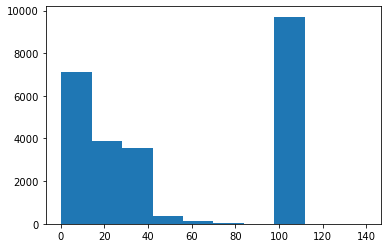

In [19]:
import matplotlib.pyplot as plt
plt.hist(df8['CPM2'])

In [47]:
df8 = df
df9 = df8.drop_duplicates(subset=['delivery_start', 'min_impressions', 'max_impressions', 'min_spend', 'max_spend', 'ad_body'])
df9.index = range(df9.shape[0])
df9

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM,CPM2,impressions2,spend2,CPM3,facebook,instagram,messenger,audience_network,demographic_dist
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,3,...,33.011004,19.607843,2499,99,39.615846,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g..."
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,3,...,99.099099,98.196393,999,99,99.099099,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g..."
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,5,...,49.524762,32.688459,1499,99,66.044029,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g..."
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,15,...,49.524762,32.688459,1499,99,66.044029,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g..."
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,18,...,26.601773,27.922234,12499,349,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22527,analytics,BR,1445990532337716,ShareAmerica,240738354310133,2021-01-26,1,2021-01-27,2021-01-31,4,...,9.900990,5.158438,9499,99,10.422150,1,0,0,0,"[{'percentage': '0.528781', 'age': '18-24', 'g..."
22528,analytics,BR,1445990532337716,ShareAmerica,317299229725676,2021-01-26,1,2021-01-27,2021-01-31,4,...,6.600440,3.920314,12499,99,7.920634,1,0,0,0,"[{'percentage': '0.144393', 'age': '65+', 'gen..."
22529,analytics,BR,1445990532337716,ShareAmerica,491096738951834,2021-01-26,1,2021-01-27,2021-01-31,4,...,19.803961,10.891309,4499,99,22.004890,1,0,0,0,"[{'percentage': '0.243153', 'age': '45-54', 'g..."
22530,analytics,BR,1445990532337716,ShareAmerica,1123476751437734,2021-01-26,1,2021-01-27,2021-01-31,4,...,4.950248,2.800160,17499,99,5.657466,1,0,0,0,"[{'percentage': '0.492822', 'age': '25-34', 'g..."


In [23]:
df10 = df7[(np.abs(stats.zscore(df7['CPM2'])) < 2)]
df10.CPM2 = np.log(df10.CPM2)
df10

C:\Users\root\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM,CPM2,impressions2,spend2,CPM3,facebook,instagram,messenger,audience_network,demographic_dist
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,3,...,33.011004,2.975930,2499,99,39.615846,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g..."
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,3,...,99.099099,4.586969,999,99,99.099099,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g..."
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,5,...,49.524762,3.487022,1499,99,66.044029,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g..."
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,15,...,49.524762,3.487022,1499,99,66.044029,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g..."
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,18,...,26.601773,3.329423,12499,349,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24838,analytics,BR,1445990532337716,ShareAmerica,240738354310133,2021-01-26,1,2021-01-27,2021-01-31,4,...,9.900990,1.640634,9499,99,10.422150,1,0,0,0,"[{'percentage': '0.528781', 'age': '18-24', 'g..."
24839,analytics,BR,1445990532337716,ShareAmerica,317299229725676,2021-01-26,1,2021-01-27,2021-01-31,4,...,6.600440,1.366172,12499,99,7.920634,1,0,0,0,"[{'percentage': '0.144393', 'age': '65+', 'gen..."
24840,analytics,BR,1445990532337716,ShareAmerica,491096738951834,2021-01-26,1,2021-01-27,2021-01-31,4,...,19.803961,2.387965,4499,99,22.004890,1,0,0,0,"[{'percentage': '0.243153', 'age': '45-54', 'g..."
24841,analytics,BR,1445990532337716,ShareAmerica,1123476751437734,2021-01-26,1,2021-01-27,2021-01-31,4,...,4.950248,1.029677,17499,99,5.657466,1,0,0,0,"[{'percentage': '0.492822', 'age': '25-34', 'g..."


(array([  12.,   27.,   78.,  444., 1053., 2573., 6106., 4219.,  547.,
        9752.]),
 array([-1.52427566, -0.87792997, -0.23158427,  0.41476142,  1.06110711,
         1.70745281,  2.3537985 ,  3.00014419,  3.64648988,  4.29283558,
         4.93918127]),
 <BarContainer object of 10 artists>)

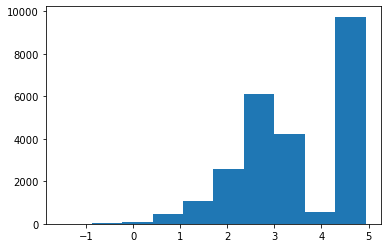

In [24]:
plt.hist(df10['CPM2'])

In [33]:
df10

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM,CPM2,impressions2,spend2,CPM3,facebook,instagram,messenger,audience_network,demographic_dist
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,3,...,33.011004,2.975930,2499,99,39.615846,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g..."
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,3,...,99.099099,4.586969,999,99,99.099099,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g..."
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,5,...,49.524762,3.487022,1499,99,66.044029,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g..."
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,15,...,49.524762,3.487022,1499,99,66.044029,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g..."
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,18,...,26.601773,3.329423,12499,349,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24838,analytics,BR,1445990532337716,ShareAmerica,240738354310133,2021-01-26,1,2021-01-27,2021-01-31,4,...,9.900990,1.640634,9499,99,10.422150,1,0,0,0,"[{'percentage': '0.528781', 'age': '18-24', 'g..."
24839,analytics,BR,1445990532337716,ShareAmerica,317299229725676,2021-01-26,1,2021-01-27,2021-01-31,4,...,6.600440,1.366172,12499,99,7.920634,1,0,0,0,"[{'percentage': '0.144393', 'age': '65+', 'gen..."
24840,analytics,BR,1445990532337716,ShareAmerica,491096738951834,2021-01-26,1,2021-01-27,2021-01-31,4,...,19.803961,2.387965,4499,99,22.004890,1,0,0,0,"[{'percentage': '0.243153', 'age': '45-54', 'g..."
24841,analytics,BR,1445990532337716,ShareAmerica,1123476751437734,2021-01-26,1,2021-01-27,2021-01-31,4,...,4.950248,1.029677,17499,99,5.657466,1,0,0,0,"[{'percentage': '0.492822', 'age': '25-34', 'g..."


<ipython-input-38-bd82087dadec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['CPM2_bin'] = pd.cut(x=df11['CPM2'], bins=[-2, 3, 4.4, 5], labels=[0,1,2], ordered=True)


(array([10293.,     0.,     0.,     0.,     0.,  4789.,     0.,     0.,
            0.,  9729.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

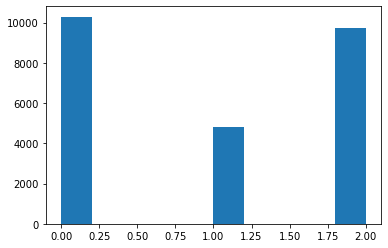

In [38]:
df11 = df10
df11['CPM2_bin'] = pd.cut(x=df11['CPM2'], bins=[-2, 3, 4.4, 5], labels=[0,1,2], ordered=True)
plt.hist(df11['CPM2_bin'])

<ipython-input-32-92fc19d557cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['CPM2'] = np.log(df11['CPM2'])


ConversionError: Failed to convert value(s) to axis units: array(['Save Texas', 'Save Texas', 'Campaign Ad-Cloud', ...,
       'ShareAmerica', 'ShareAmerica', 'Ricardo Caminhoneiro 22310'],
      dtype=object)

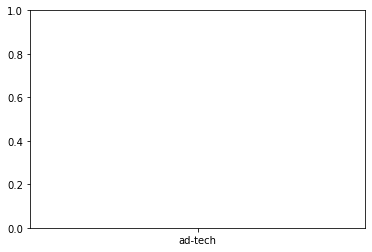

In [32]:
df11 = df
df11 = df11.drop_duplicates(subset=['ad_creation_date', 'delivery_start', 'delivery_stop', 'min_impressions', 'max_impressions', 'min_spend', 'max_spend', 'ad_body'])
df11.index=range(df11.shape[0])
df11['CPM2'] = np.log(df11['CPM2'])
df11 = df11[(np.abs(stats.zscore(df11['CPM2'])) < 2)]
plt.hist(df11)

In [27]:
df11.CPM2

0        2.975930
1        4.586969
2        3.487022
3        3.487022
4        3.329423
           ...   
24836    4.586969
24838    1.640634
24839    1.366172
24840    2.387965
24842    2.975930
Name: CPM2, Length: 24177, dtype: float64

## spend/delivery_period

In [6]:
df

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,max_audience_size,impressions,spend,CPM,CPM2,facebook,instagram,messenger,audience_network,demographic_dist
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,100000,2499,49,33.011004,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g..."
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,500000,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g..."
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,5000,1499,49,49.524762,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g..."
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,50000,1499,49,49.524762,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g..."
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,5000,12499,349,26.601773,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38869,analytics,BR,115255603631922,Ricardo Caminhoneiro 22310,600549173955885,2020-08-27,8,2020-08-27,2020-08-29,3,...,NaN,2499,49,33.011004,19.607843,1,1,1,0,"[{'percentage': '0.046118', 'age': '35-44', 'g..."
38870,analytics,BR,197246230417092,Superweek - European Analytics Summit,1132843716910980,2019-06-11,6,2019-06-11,2019-06-19,9,...,NaN,64999,249,4.271490,3.830828,1,0,0,0,"[{'percentage': '0.000264', 'age': '55-64', 'g..."
38871,analytics,BR,197246230417092,Superweek - European Analytics Summit,1409280549253390,2019-06-07,6,2019-06-09,2019-06-11,3,...,NaN,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.395973', 'age': '25-34', 'g..."
38872,analytics,BR,197246230417092,Superweek - European Analytics Summit,2268489546735968,2019-06-07,6,2019-06-09,2019-06-12,4,...,NaN,9499,49,9.900990,5.158438,1,0,0,0,"[{'percentage': '0.000219', 'age': '18-24', 'g..."


In [166]:
df.dtypes

search_term          category
country              category
page_id                object
page_name              object
ad_id                  object
ad_creation_date       object
ad_creation_month       int64
delivery_start         object
delivery_stop          object
delivery_period         int64
ad_url                 object
ad_body                object
uses_multi_body         int64
link_caption           object
uses_multi_capt         int64
link_title             object
uses_multi_title        int64
link_description       object
uses_multi_desc         int64
language               object
uses_multi_lang         int64
funded_by              object
currency               object
min_spend               int64
max_spend               int64
min_impressions         int64
max_impressions         int64
min_audience_size      object
max_audience_size      object
impressions             int64
spend                   int64
CPM                   float64
CPM2                  float64
impression

In [39]:
df.columns

Index(['search_term', 'country', 'page_id', 'page_name', 'ad_id',
       'ad_creation_date', 'ad_creation_month', 'delivery_start',
       'delivery_stop', 'delivery_period', 'ad_url', 'ad_body',
       'uses_multi_body', 'link_caption', 'uses_multi_capt', 'link_title',
       'uses_multi_title', 'link_description', 'uses_multi_desc', 'language',
       'uses_multi_lang', 'funded_by', 'currency', 'min_spend', 'max_spend',
       'min_impressions', 'max_impressions', 'min_audience_size',
       'max_audience_size', 'impressions', 'spend', 'CPM', 'CPM2', 'facebook',
       'instagram', 'messenger', 'audience_network', 'demographic_dist',
       'spend_per_day'],
      dtype='object')

In [7]:
df['spend_per_day'] = pd.DataFrame(np.divide(np.array(df['spend']), np.array(df['delivery_period'])))
df

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,impressions,spend,CPM,CPM2,facebook,instagram,messenger,audience_network,demographic_dist,spend_per_day
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,2499,49,33.011004,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g...",12.250000
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g...",12.250000
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,1499,49,49.524762,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g...",8.166667
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,1499,49,49.524762,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g...",3.062500
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,12499,349,26.601773,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g...",18.368421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38869,analytics,BR,115255603631922,Ricardo Caminhoneiro 22310,600549173955885,2020-08-27,8,2020-08-27,2020-08-29,3,...,2499,49,33.011004,19.607843,1,1,1,0,"[{'percentage': '0.046118', 'age': '35-44', 'g...",16.333333
38870,analytics,BR,197246230417092,Superweek - European Analytics Summit,1132843716910980,2019-06-11,6,2019-06-11,2019-06-19,9,...,64999,249,4.271490,3.830828,1,0,0,0,"[{'percentage': '0.000264', 'age': '55-64', 'g...",27.666667
38871,analytics,BR,197246230417092,Superweek - European Analytics Summit,1409280549253390,2019-06-07,6,2019-06-09,2019-06-11,3,...,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.395973', 'age': '25-34', 'g...",16.333333
38872,analytics,BR,197246230417092,Superweek - European Analytics Summit,2268489546735968,2019-06-07,6,2019-06-09,2019-06-12,4,...,9499,49,9.900990,5.158438,1,0,0,0,"[{'percentage': '0.000219', 'age': '18-24', 'g...",12.250000


In [42]:
df2 = df

In [43]:
df2

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,impressions,spend,CPM,CPM2,facebook,instagram,messenger,audience_network,demographic_dist,spend_per_day
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,2499,49,33.011004,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g...",12.250000
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g...",12.250000
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,1499,49,49.524762,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g...",8.166667
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,1499,49,49.524762,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g...",3.062500
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,12499,349,26.601773,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g...",18.368421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38869,analytics,BR,115255603631922,Ricardo Caminhoneiro 22310,600549173955885,2020-08-27,8,2020-08-27,2020-08-29,3,...,2499,49,33.011004,19.607843,1,1,1,0,"[{'percentage': '0.046118', 'age': '35-44', 'g...",16.333333
38870,analytics,BR,197246230417092,Superweek - European Analytics Summit,1132843716910980,2019-06-11,6,2019-06-11,2019-06-19,9,...,64999,249,4.271490,3.830828,1,0,0,0,"[{'percentage': '0.000264', 'age': '55-64', 'g...",27.666667
38871,analytics,BR,197246230417092,Superweek - European Analytics Summit,1409280549253390,2019-06-07,6,2019-06-09,2019-06-11,3,...,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.395973', 'age': '25-34', 'g...",16.333333
38872,analytics,BR,197246230417092,Superweek - European Analytics Summit,2268489546735968,2019-06-07,6,2019-06-09,2019-06-12,4,...,9499,49,9.900990,5.158438,1,0,0,0,"[{'percentage': '0.000219', 'age': '18-24', 'g...",12.250000


In [170]:
df2.dtypes

search_term          category
country              category
page_id                object
page_name              object
ad_id                  object
ad_creation_date       object
ad_creation_month       int64
delivery_start         object
delivery_stop          object
delivery_period         int64
ad_url                 object
ad_body                object
uses_multi_body         int64
link_caption           object
uses_multi_capt         int64
link_title             object
uses_multi_title        int64
link_description       object
uses_multi_desc         int64
language               object
uses_multi_lang         int64
funded_by              object
currency               object
min_spend               int64
max_spend               int64
min_impressions         int64
max_impressions         int64
min_audience_size      object
max_audience_size      object
impressions             int64
spend                   int64
CPM                   float64
CPM2                  float64
impression

In [47]:
df2['spend_per_day'] = pd.DataFrame(np.divide(np.array(df2['spend']), np.array(df2['delivery_period'])))
df2

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,impressions,spend,CPM,CPM2,facebook,instagram,messenger,audience_network,demographic_dist,spend_per_day
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,2499,49,33.011004,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g...",12.250000
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g...",12.250000
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,1499,49,49.524762,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g...",8.166667
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,1499,49,49.524762,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g...",3.062500
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,12499,349,26.601773,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g...",18.368421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38869,analytics,BR,115255603631922,Ricardo Caminhoneiro 22310,600549173955885,2020-08-27,8,2020-08-27,2020-08-29,3,...,2499,49,33.011004,19.607843,1,1,1,0,"[{'percentage': '0.046118', 'age': '35-44', 'g...",16.333333
38870,analytics,BR,197246230417092,Superweek - European Analytics Summit,1132843716910980,2019-06-11,6,2019-06-11,2019-06-19,9,...,64999,249,4.271490,3.830828,1,0,0,0,"[{'percentage': '0.000264', 'age': '55-64', 'g...",27.666667
38871,analytics,BR,197246230417092,Superweek - European Analytics Summit,1409280549253390,2019-06-07,6,2019-06-09,2019-06-11,3,...,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.395973', 'age': '25-34', 'g...",16.333333
38872,analytics,BR,197246230417092,Superweek - European Analytics Summit,2268489546735968,2019-06-07,6,2019-06-09,2019-06-12,4,...,9499,49,9.900990,5.158438,1,0,0,0,"[{'percentage': '0.000219', 'age': '18-24', 'g...",12.250000


(array([3.8724e+04, 1.0800e+02, 2.4000e+01, 7.0000e+00, 5.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([5.71761960e-02, 4.37526459e+02, 8.74995741e+02, 1.31246502e+03,
        1.74993431e+03, 2.18740359e+03, 2.62487287e+03, 3.06234215e+03,
        3.49981144e+03, 3.93728072e+03, 4.37475000e+03]),
 <BarContainer object of 10 artists>)

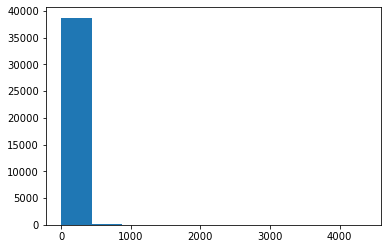

In [48]:
import matplotlib.pyplot as plt
plt.hist(df2['spend_per_day'])

(array([22856.,  8130.,  5851.,   331.,   474.,   140.,   162.,   140.,
          132.,    63.]),
 array([5.71761960e-02, 1.71540902e+01, 3.42510041e+01, 5.13479181e+01,
        6.84448320e+01, 8.55417460e+01, 1.02638660e+02, 1.19735574e+02,
        1.36832488e+02, 1.53929402e+02, 1.71026316e+02]),
 <BarContainer object of 10 artists>)

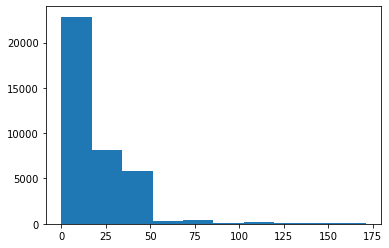

In [49]:
df2 = df2[(np.abs(stats.zscore(df2['spend_per_day'])) < 2)]
# df2.spend_per_day = np.log(df10.CPM2)
plt.hist(df2.spend_per_day)

In [50]:
df2

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,impressions,spend,CPM,CPM2,facebook,instagram,messenger,audience_network,demographic_dist,spend_per_day
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,2499,49,33.011004,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g...",12.250000
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g...",12.250000
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,1499,49,49.524762,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g...",8.166667
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,1499,49,49.524762,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g...",3.062500
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,12499,349,26.601773,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g...",18.368421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38869,analytics,BR,115255603631922,Ricardo Caminhoneiro 22310,600549173955885,2020-08-27,8,2020-08-27,2020-08-29,3,...,2499,49,33.011004,19.607843,1,1,1,0,"[{'percentage': '0.046118', 'age': '35-44', 'g...",16.333333
38870,analytics,BR,197246230417092,Superweek - European Analytics Summit,1132843716910980,2019-06-11,6,2019-06-11,2019-06-19,9,...,64999,249,4.271490,3.830828,1,0,0,0,"[{'percentage': '0.000264', 'age': '55-64', 'g...",27.666667
38871,analytics,BR,197246230417092,Superweek - European Analytics Summit,1409280549253390,2019-06-07,6,2019-06-09,2019-06-11,3,...,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.395973', 'age': '25-34', 'g...",16.333333
38872,analytics,BR,197246230417092,Superweek - European Analytics Summit,2268489546735968,2019-06-07,6,2019-06-09,2019-06-12,4,...,9499,49,9.900990,5.158438,1,0,0,0,"[{'percentage': '0.000219', 'age': '18-24', 'g...",12.250000


C:\Users\root\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(array([1.0000e+00, 2.7000e+01, 2.6500e+02, 9.4900e+02, 3.2180e+03,
        4.8030e+03, 9.3340e+03, 1.2396e+04, 6.4890e+03, 7.9700e+02]),
 array([-2.86161762, -2.06127411, -1.26093061, -0.4605871 ,  0.3397564 ,
         1.14009991,  1.94044341,  2.74078692,  3.54113043,  4.34147393,
         5.14181744]),
 <BarContainer object of 10 artists>)

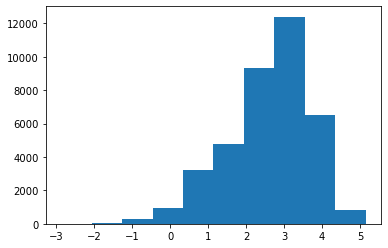

In [51]:
df2.spend_per_day = np.log(df2.spend_per_day)
plt.hist(df2.spend_per_day)

In [52]:
df2

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,impressions,spend,CPM,CPM2,facebook,instagram,messenger,audience_network,demographic_dist,spend_per_day
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,2499,49,33.011004,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g...",2.505526
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g...",2.505526
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,1499,49,49.524762,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g...",2.100061
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,1499,49,49.524762,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g...",1.119232
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,12499,349,26.601773,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g...",2.910633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38869,analytics,BR,115255603631922,Ricardo Caminhoneiro 22310,600549173955885,2020-08-27,8,2020-08-27,2020-08-29,3,...,2499,49,33.011004,19.607843,1,1,1,0,"[{'percentage': '0.046118', 'age': '35-44', 'g...",2.793208
38870,analytics,BR,197246230417092,Superweek - European Analytics Summit,1132843716910980,2019-06-11,6,2019-06-11,2019-06-19,9,...,64999,249,4.271490,3.830828,1,0,0,0,"[{'percentage': '0.000264', 'age': '55-64', 'g...",3.320228
38871,analytics,BR,197246230417092,Superweek - European Analytics Summit,1409280549253390,2019-06-07,6,2019-06-09,2019-06-11,3,...,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.395973', 'age': '25-34', 'g...",2.793208
38872,analytics,BR,197246230417092,Superweek - European Analytics Summit,2268489546735968,2019-06-07,6,2019-06-09,2019-06-12,4,...,9499,49,9.900990,5.158438,1,0,0,0,"[{'percentage': '0.000219', 'age': '18-24', 'g...",2.505526


In [53]:
# df2.spend_per_day_sqrt = np.sqrt(df2.spend_per_day)
# plt.hist(df2.spend_per_day_sqrt)

In [19]:
# df2['spend_per_day_square'] = np.square(df2.spend_per_day)
# plt.hist(df2.spend_per_day_square)

In [20]:
# plt.hist(df2.spend_per_day_sqrt)

In [21]:
# df2['spend_per_day_cube'] = np.cbrt(df2.spend_per_day)
# plt.hist(df2['spend_per_day_cube'])

In [22]:
# df2.spend_per_day = np.cbrt(df2.spend_per_day)
# plt.hist(df2.spend_per_day)

In [23]:
df2

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,impressions,spend,CPM,CPM2,facebook,instagram,messenger,audience_network,demographic_dist,spend_per_day
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,2499,49,33.011004,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g...",2.505526
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g...",2.505526
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,1499,49,49.524762,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g...",2.100061
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,1499,49,49.524762,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g...",1.119232
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,12499,349,26.601773,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g...",2.910633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38869,analytics,BR,115255603631922,Ricardo Caminhoneiro 22310,600549173955885,2020-08-27,8,2020-08-27,2020-08-29,3,...,2499,49,33.011004,19.607843,1,1,1,0,"[{'percentage': '0.046118', 'age': '35-44', 'g...",2.793208
38870,analytics,BR,197246230417092,Superweek - European Analytics Summit,1132843716910980,2019-06-11,6,2019-06-11,2019-06-19,9,...,64999,249,4.271490,3.830828,1,0,0,0,"[{'percentage': '0.000264', 'age': '55-64', 'g...",3.320228
38871,analytics,BR,197246230417092,Superweek - European Analytics Summit,1409280549253390,2019-06-07,6,2019-06-09,2019-06-11,3,...,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.395973', 'age': '25-34', 'g...",2.793208
38872,analytics,BR,197246230417092,Superweek - European Analytics Summit,2268489546735968,2019-06-07,6,2019-06-09,2019-06-12,4,...,9499,49,9.900990,5.158438,1,0,0,0,"[{'percentage': '0.000219', 'age': '18-24', 'g...",2.505526


In [24]:
df2

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,impressions,spend,CPM,CPM2,facebook,instagram,messenger,audience_network,demographic_dist,spend_per_day
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,2499,49,33.011004,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g...",2.505526
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g...",2.505526
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,1499,49,49.524762,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g...",2.100061
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,1499,49,49.524762,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g...",1.119232
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,12499,349,26.601773,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g...",2.910633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38869,analytics,BR,115255603631922,Ricardo Caminhoneiro 22310,600549173955885,2020-08-27,8,2020-08-27,2020-08-29,3,...,2499,49,33.011004,19.607843,1,1,1,0,"[{'percentage': '0.046118', 'age': '35-44', 'g...",2.793208
38870,analytics,BR,197246230417092,Superweek - European Analytics Summit,1132843716910980,2019-06-11,6,2019-06-11,2019-06-19,9,...,64999,249,4.271490,3.830828,1,0,0,0,"[{'percentage': '0.000264', 'age': '55-64', 'g...",3.320228
38871,analytics,BR,197246230417092,Superweek - European Analytics Summit,1409280549253390,2019-06-07,6,2019-06-09,2019-06-11,3,...,499,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.395973', 'age': '25-34', 'g...",2.793208
38872,analytics,BR,197246230417092,Superweek - European Analytics Summit,2268489546735968,2019-06-07,6,2019-06-09,2019-06-12,4,...,9499,49,9.900990,5.158438,1,0,0,0,"[{'percentage': '0.000219', 'age': '18-24', 'g...",2.505526


In [46]:
df2.shape

(38874, 39)

In [26]:
df2.impressions.describe()

count     38279.000000
mean       8836.665561
std       36191.695421
min         499.000000
25%         499.000000
50%         499.000000
75%        3499.000000
max      949999.000000
Name: impressions, dtype: float64

In [66]:
df2['impressions_per_day'] = pd.DataFrame(np.divide(np.array(df2['impressions']), np.array(df2['delivery_period'])))
df2

<ipython-input-66-ca9e6a7f3758>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['impressions_per_day'] = pd.DataFrame(np.divide(np.array(df2['impressions']), np.array(df2['delivery_period'])))


,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM2,facebook,instagram,messenger,audience_network,demographic_dist,spend_per_day,impressions_per_day,impressions_per_day_log,CPM_scaled
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g...",2.505526,624.750000,6.437352,389.216887
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g...",2.505526,124.750000,4.826312,519.138853
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g...",2.100061,249.833333,5.520794,380.391085
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g...",1.119232,93.687500,4.539965,246.528692
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g...",2.910633,657.842105,6.488965,448.551190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,analytics,US,110749446963570,Courier,796135877907063,2020-10-01,10,2020-10-01,2020-10-08,8,...,8.514772,1,1,0,0,"[{'percentage': '0.055955', 'age': '35-44', 'g...",2.924505,NaN,6.725034,NaN
38275,analytics,US,110749446963570,Courier,802408860506221,2020-10-01,10,2020-10-02,2020-10-08,7,...,98.196393,1,1,0,0,"[{'percentage': '1', 'age': '35-44', 'gender':...",1.945910,NaN,8.884903,NaN
38276,analytics,US,110749446963570,Courier,936223993568657,2020-10-01,10,2020-10-01,2020-10-08,8,...,4.584756,1,1,0,0,"[{'percentage': '0.200857', 'age': '25-34', 'g...",2.924505,NaN,5.113994,NaN
38277,analytics,US,110749446963570,Courier,985713038597319,2020-10-01,10,2020-10-01,2020-10-08,8,...,5.418379,1,1,0,0,"[{'percentage': '0.0709', 'age': '35-44', 'gen...",2.924505,NaN,7.772647,NaN


In [28]:
df2['impressions_per_day'].describe()

count     37695.000000
mean        998.325675
std        3298.070998
min           0.582264
25%         124.750000
50%         249.500000
75%         749.500000
max      162499.750000
Name: impressions_per_day, dtype: float64

(array([3.7513e+04, 1.2800e+02, 2.6000e+01, 1.0000e+01, 1.0000e+01,
        3.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([5.82263711e-01, 1.62504990e+04, 3.25004158e+04, 4.87503326e+04,
        6.50002494e+04, 8.12501661e+04, 9.75000829e+04, 1.13750000e+05,
        1.29999916e+05, 1.46249833e+05, 1.62499750e+05]),
 <BarContainer object of 10 artists>)

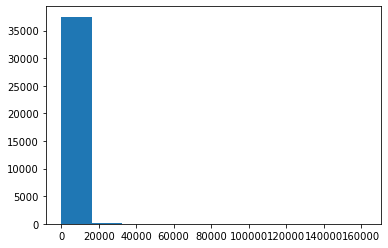

In [29]:
plt.hist(df2['impressions_per_day'])

(array([3.3863e+04, 1.9130e+03, 7.2600e+02, 4.1700e+02, 2.6900e+02,
        1.3500e+02, 1.1600e+02, 3.8000e+01, 5.8000e+01, 2.9000e+01]),
 array([5.82263711e-01, 1.96480261e+03, 3.92902295e+03, 5.89324330e+03,
        7.85746364e+03, 9.82168399e+03, 1.17859043e+04, 1.37501247e+04,
        1.57143450e+04, 1.76785654e+04, 1.96427857e+04]),
 <BarContainer object of 10 artists>)

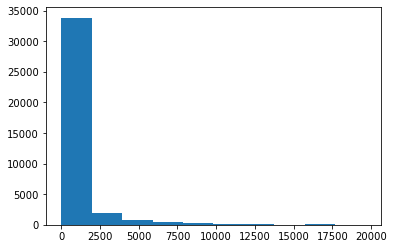

In [55]:
df2 = df2[df2['impressions_per_day']<20000]
plt.hist(df2['impressions_per_day'])

In [56]:
df2.shape

(37564, 40)

In [31]:
df2

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,spend,CPM,CPM2,facebook,instagram,messenger,audience_network,demographic_dist,spend_per_day,impressions_per_day
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,49,33.011004,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g...",2.505526,624.750000
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,49,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g...",2.505526,124.750000
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,49,49.524762,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g...",2.100061,249.833333
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,49,49.524762,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g...",1.119232,93.687500
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,349,26.601773,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g...",2.910633,657.842105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,analytics,US,110749446963570,Courier,796135877907063,2020-10-01,10,2020-10-01,2020-10-08,8,...,149,9.950498,8.514772,1,1,0,0,"[{'percentage': '0.055955', 'age': '35-44', 'g...",2.924505,833.000000
38275,analytics,US,110749446963570,Courier,802408860506221,2020-10-01,10,2020-10-02,2020-10-08,7,...,49,99.099099,98.196393,1,1,0,0,"[{'percentage': '1', 'age': '35-44', 'gender':...",1.945910,7222.111111
38276,analytics,US,110749446963570,Courier,936223993568657,2020-10-01,10,2020-10-01,2020-10-08,8,...,149,5.685877,4.584756,1,1,0,0,"[{'percentage': '0.200857', 'age': '25-34', 'g...",2.924505,166.333333
38277,analytics,US,110749446963570,Courier,985713038597319,2020-10-01,10,2020-10-01,2020-10-08,8,...,149,6.633554,5.418379,1,1,0,0,"[{'percentage': '0.0709', 'age': '35-44', 'gen...",2.924505,2374.750000


<ipython-input-58-d511a1a623e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['impressions_per_day_log'] = np.log(df2['impressions_per_day'])


(array([1.0000e+00, 3.6000e+01, 3.8600e+02, 2.2440e+03, 5.3820e+03,
        1.2215e+04, 9.7180e+03, 4.4630e+03, 2.3390e+03, 7.8000e+02]),
 array([-0.54083182,  0.5017979 ,  1.54442762,  2.58705735,  3.62968707,
         4.67231679,  5.71494652,  6.75757624,  7.80020596,  8.84283569,
         9.88546541]),
 <BarContainer object of 10 artists>)

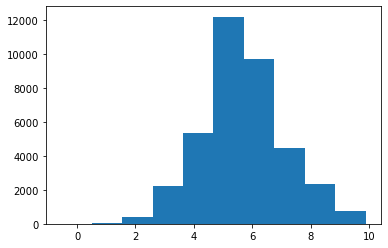

In [58]:
df2['impressions_per_day_log'] = np.log(df2['impressions_per_day'])
plt.hist(df2['impressions_per_day_log'])

(array([1.0000e+00, 2.7000e+01, 2.6300e+02, 9.2800e+02, 3.1710e+03,
        4.6990e+03, 9.1810e+03, 1.2175e+04, 6.3370e+03, 7.8200e+02]),
 array([-2.86161762, -2.06127411, -1.26093061, -0.4605871 ,  0.3397564 ,
         1.14009991,  1.94044341,  2.74078692,  3.54113043,  4.34147393,
         5.14181744]),
 <BarContainer object of 10 artists>)

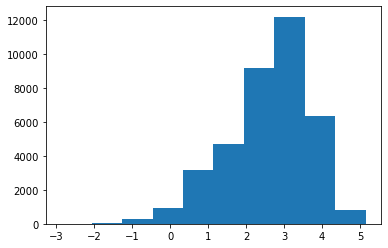

In [59]:
plt.hist(df2.spend_per_day)

In [60]:
df2.columns

Index(['search_term', 'country', 'page_id', 'page_name', 'ad_id',
       'ad_creation_date', 'ad_creation_month', 'delivery_start',
       'delivery_stop', 'delivery_period', 'ad_url', 'ad_body',
       'uses_multi_body', 'link_caption', 'uses_multi_capt', 'link_title',
       'uses_multi_title', 'link_description', 'uses_multi_desc', 'language',
       'uses_multi_lang', 'funded_by', 'currency', 'min_spend', 'max_spend',
       'min_impressions', 'max_impressions', 'min_audience_size',
       'max_audience_size', 'impressions', 'spend', 'CPM', 'CPM2', 'facebook',
       'instagram', 'messenger', 'audience_network', 'demographic_dist',
       'spend_per_day', 'impressions_per_day', 'impressions_per_day_log'],
      dtype='object')

In [61]:
df2

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM,CPM2,facebook,instagram,messenger,audience_network,demographic_dist,spend_per_day,impressions_per_day,impressions_per_day_log
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,33.011004,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g...",2.505526,624.750000,6.437352
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,99.099099,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g...",2.505526,124.750000,4.826312
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,49.524762,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g...",2.100061,249.833333,5.520794
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,49.524762,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g...",1.119232,93.687500,4.539965
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,26.601773,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g...",2.910633,657.842105,6.488965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,analytics,US,110749446963570,Courier,796135877907063,2020-10-01,10,2020-10-01,2020-10-08,8,...,9.950498,8.514772,1,1,0,0,"[{'percentage': '0.055955', 'age': '35-44', 'g...",2.924505,833.000000,6.725034
38275,analytics,US,110749446963570,Courier,802408860506221,2020-10-01,10,2020-10-02,2020-10-08,7,...,99.099099,98.196393,1,1,0,0,"[{'percentage': '1', 'age': '35-44', 'gender':...",1.945910,7222.111111,8.884903
38276,analytics,US,110749446963570,Courier,936223993568657,2020-10-01,10,2020-10-01,2020-10-08,8,...,5.685877,4.584756,1,1,0,0,"[{'percentage': '0.200857', 'age': '25-34', 'g...",2.924505,166.333333,5.113994
38277,analytics,US,110749446963570,Courier,985713038597319,2020-10-01,10,2020-10-01,2020-10-08,8,...,6.633554,5.418379,1,1,0,0,"[{'percentage': '0.0709', 'age': '35-44', 'gen...",2.924505,2374.750000,7.772647


# Very nice :)

In [62]:
df2['CPM_scaled'] = pd.DataFrame(np.divide(np.array(df2['spend_per_day']), np.array(df2['impressions_per_day_log'])))
df2['CPM_scaled'] = df2['CPM_scaled']*1000
df2

<ipython-input-62-f64647d6f679>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CPM_scaled'] = pd.DataFrame(np.divide(np.array(df2['spend_per_day']), np.array(df2['impressions_per_day_log'])))
<ipython-input-62-f64647d6f679>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CPM_scaled'] = df2['CPM_scaled']*1000


,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM2,facebook,instagram,messenger,audience_network,demographic_dist,spend_per_day,impressions_per_day,impressions_per_day_log,CPM_scaled
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,19.607843,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g...",2.505526,624.750000,6.437352,389.216887
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,98.196393,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g...",2.505526,124.750000,4.826312,519.138853
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,32.688459,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g...",2.100061,249.833333,5.520794,380.391085
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,32.688459,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g...",1.119232,93.687500,4.539965,246.528692
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g...",2.910633,657.842105,6.488965,448.551190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,analytics,US,110749446963570,Courier,796135877907063,2020-10-01,10,2020-10-01,2020-10-08,8,...,8.514772,1,1,0,0,"[{'percentage': '0.055955', 'age': '35-44', 'g...",2.924505,833.000000,6.725034,NaN
38275,analytics,US,110749446963570,Courier,802408860506221,2020-10-01,10,2020-10-02,2020-10-08,7,...,98.196393,1,1,0,0,"[{'percentage': '1', 'age': '35-44', 'gender':...",1.945910,7222.111111,8.884903,NaN
38276,analytics,US,110749446963570,Courier,936223993568657,2020-10-01,10,2020-10-01,2020-10-08,8,...,4.584756,1,1,0,0,"[{'percentage': '0.200857', 'age': '25-34', 'g...",2.924505,166.333333,5.113994,NaN
38277,analytics,US,110749446963570,Courier,985713038597319,2020-10-01,10,2020-10-01,2020-10-08,8,...,5.418379,1,1,0,0,"[{'percentage': '0.0709', 'age': '35-44', 'gen...",2.924505,2374.750000,7.772647,NaN


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.3000e+01,
        1.8054e+04, 1.8360e+04, 3.9500e+02, 3.5000e+01, 7.0000e+00]),
 array([-4220.13330071, -3440.99244405, -2661.8515874 , -1882.71073075,
        -1103.56987409,  -324.42901744,   454.71183921,  1233.85269587,
         2012.99355252,  2792.13440918,  3571.27526583]),
 <BarContainer object of 10 artists>)

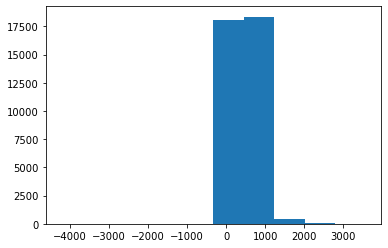

In [63]:
plt.hist(df2['CPM_scaled'])

In [64]:
df3 = df2[df2['CPM_scaled']>=-500]
df3 = df3[df3['CPM_scaled']<=2000]

(array([   41.,   707.,  5983., 14712., 11322.,  2961.,   728.,   246.,
           89.,    32.]),
 array([-464.84304413, -220.21206736,   24.41890942,  269.04988619,
         513.68086297,  758.31183974, 1002.94281652, 1247.57379329,
        1492.20477007, 1736.83574684, 1981.46672362]),
 <BarContainer object of 10 artists>)

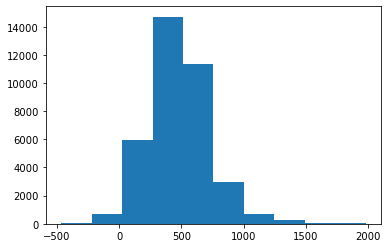

In [65]:
plt.hist(df3['CPM_scaled'])

C:\Users\root\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([  119.,   889.,  2270.,  5204., 11254., 11606.,  3642.,   934.,
          258.,    65.]),
 array([ 0.        ,  4.4513669 ,  8.90273379, 13.35410069, 17.80546758,
        22.25683448, 26.70820137, 31.15956827, 35.61093516, 40.06230206,
        44.51366895]),
 <BarContainer object of 10 artists>)

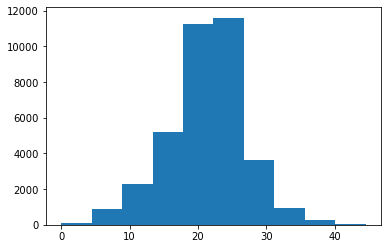

In [37]:
df3['CPM_scaled_sqrt'] = np.sqrt(df3['CPM_scaled'])
plt.hist(df3['CPM_scaled_sqrt'])

(array([   59.,   297.,   210.,    32.,    46.,  1094.,  5038., 20917.,
         8604.,   524.]),
 array([-7.74643912, -5.71577799, -3.68511685, -1.65445572,  0.37620542,
         2.40686655,  4.43752768,  6.46818882,  8.49884995, 10.52951109,
        12.56017222]),
 <BarContainer object of 10 artists>)

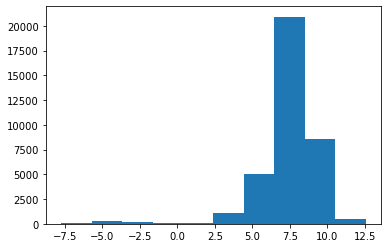

In [198]:
df3['CPM_scaled_cbrt'] = np.cbrt(df3['CPM_scaled'])
plt.hist(df3['CPM_scaled_cbrt'])

In [147]:
# df2['impressions_per_day'] = pd.DataFrame(np.divide(np.array(df2['impressions']), np.array(df2['delivery_period'])))

impressions_per_day = []
for i in range(df2.shape[0]):
    df2.iloc[i].impressions_per_day = df2.iloc[i].impressions / df2.iloc[i].delivery_period
    impressions_per_day.append(temp)

In [148]:
# len(impressions_per_day)

In [150]:
# df2['impressions_per_day'] = pd.DataFrame(np.array(impressions_per_day))
df2.columns

Index(['search_term', 'country', 'page_id', 'page_name', 'ad_id',
       'ad_creation_date', 'ad_creation_month', 'delivery_start',
       'delivery_stop', 'delivery_period', 'ad_url', 'ad_body',
       'uses_multi_body', 'link_caption', 'uses_multi_capt', 'link_title',
       'uses_multi_title', 'link_description', 'uses_multi_desc', 'language',
       'uses_multi_lang', 'funded_by', 'currency', 'min_spend', 'max_spend',
       'min_impressions', 'max_impressions', 'min_audience_size',
       'max_audience_size', 'impressions', 'spend', 'CPM', 'CPM2',
       'impressions2', 'spend2', 'CPM3', 'facebook', 'instagram', 'messenger',
       'audience_network', 'demographic_dist', 'spend_per_day',
       'spend_per_day_square', 'spend_per_day_cube'],
      dtype='object')

In [129]:
df2

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM3,facebook,instagram,messenger,audience_network,demographic_dist,spend_per_day,spend_per_day_square,spend_per_day_cube,impressions_per_day
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,5,2022-05-03,2022-05-06,4,...,39.615846,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g...",1.358208,6.277660,1.358208,624.750000
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,5,2022-05-03,2022-05-06,4,...,99.099099,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g...",1.358208,6.277660,1.358208,124.750000
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,5,2022-05-03,2022-05-08,6,...,66.044029,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g...",1.280592,4.410255,1.280592,249.833333
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,4,2022-04-07,2022-04-22,16,...,66.044029,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g...",1.038261,1.252679,1.038261,93.687500
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,4,2022-04-07,2022-04-25,19,...,27.922234,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g...",1.427784,8.471784,1.427784,657.842105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38869,analytics,BR,115255603631922,Ricardo Caminhoneiro 22310,600549173955885,2020-08-27,8,2020-08-27,2020-08-29,3,...,39.615846,1,1,1,0,"[{'percentage': '0.046118', 'age': '35-44', 'g...",1.408319,7.802011,1.408319,NaN
38870,analytics,BR,197246230417092,Superweek - European Analytics Summit,1132843716910980,2019-06-11,6,2019-06-11,2019-06-19,9,...,3.830828,1,0,0,0,"[{'percentage': '0.000264', 'age': '55-64', 'g...",1.491841,11.023916,1.491841,NaN
38871,analytics,BR,197246230417092,Superweek - European Analytics Summit,1409280549253390,2019-06-07,6,2019-06-09,2019-06-11,3,...,99.099099,1,0,0,0,"[{'percentage': '0.395973', 'age': '25-34', 'g...",1.408319,7.802011,1.408319,NaN
38872,analytics,BR,197246230417092,Superweek - European Analytics Summit,2268489546735968,2019-06-07,6,2019-06-09,2019-06-12,4,...,10.422150,1,0,0,0,"[{'percentage': '0.000219', 'age': '18-24', 'g...",1.358208,6.277660,1.358208,NaN


(array([3.7513e+04, 1.2800e+02, 2.6000e+01, 1.0000e+01, 1.0000e+01,
        3.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([5.82263711e-01, 1.62504990e+04, 3.25004158e+04, 4.87503326e+04,
        6.50002494e+04, 8.12501661e+04, 9.75000829e+04, 1.13750000e+05,
        1.29999916e+05, 1.46249833e+05, 1.62499750e+05]),
 <BarContainer object of 10 artists>)

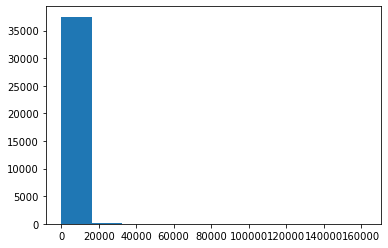

In [130]:
plt.hist(df2['impressions_per_day'])

In [131]:
df2 = df2[(np.abs(stats.zscore(df2['impressions_per_day'])) < 2)]

In [132]:
df2

,search_term,country,page_id,page_name,ad_id,ad_creation_date,ad_creation_month,delivery_start,delivery_stop,delivery_period,...,CPM3,facebook,instagram,messenger,audience_network,demographic_dist,spend_per_day,spend_per_day_square,spend_per_day_cube,impressions_per_day


<ipython-input-55-c82a1d9e8e6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['impressions_per_day'] = pd.DataFrame(np.divide(np.array(df2['impressions']), np.array(df2['delivery_period'])))


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

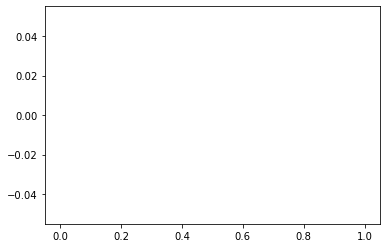

In [55]:
df2.impressions_per_day = np.log(df2.impressions_per_day)
plt.hist(df2.impressions_per_day)

(array([3.7513e+04, 1.2800e+02, 2.6000e+01, 1.0000e+01, 1.0000e+01,
        3.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([5.82263711e-01, 1.62504990e+04, 3.25004158e+04, 4.87503326e+04,
        6.50002494e+04, 8.12501661e+04, 9.75000829e+04, 1.13750000e+05,
        1.29999916e+05, 1.46249833e+05, 1.62499750e+05]),
 <BarContainer object of 10 artists>)

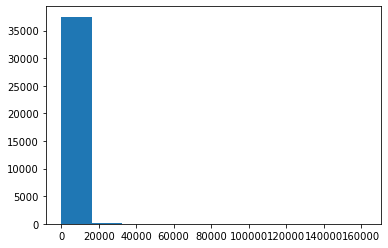